# 泰坦尼克预测
# 组员：蒲靖元 2017210447 组队人数：1


## 问题描述

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic**.  This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

我借鉴了Kaggle上的一个notebook：https://www.kaggle.com/ash316/eda-to-prediction-dietanic
他并没有带输出文件，我在改动后第一次的public score是78.9，我在改变一些特征和模型后达到了83分

## 内容清单:

#### Part1: Exploratory Data Analysis(EDA):
1)分析特征.

2)发现特征之间的关联.
#### Part2: Feature Engineering and Data Cleaning:
1)加入挖掘出的新的特征.

2)清楚冗余特征.

3)特征编码.
#### Part3: Predictive Modeling
1)基础算法模型.

2)Cross Validation.

3)Ensembling.

## Part1: Exploratory Data Analysis(EDA)

In [1]:
# NumPy
import numpy as np

# Dataframe operations
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.linear_model import Perceptron
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# data = pd.read_csv('../input/train.csv')
data = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

PassengerId = test_df['PassengerId']

# combine这个变量是我将train的data与test合在一起方便一起处理特征
combine = data.append(test_df)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 我在之后用了很多head(), info(), isnull().sum()来监控数据情况
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

训练集中的**Age, Cabin 与 Embarked** 有缺失数据，测试集中的**Fare**也有，我们应该找准合适的方法处理他们

### How many Survived??

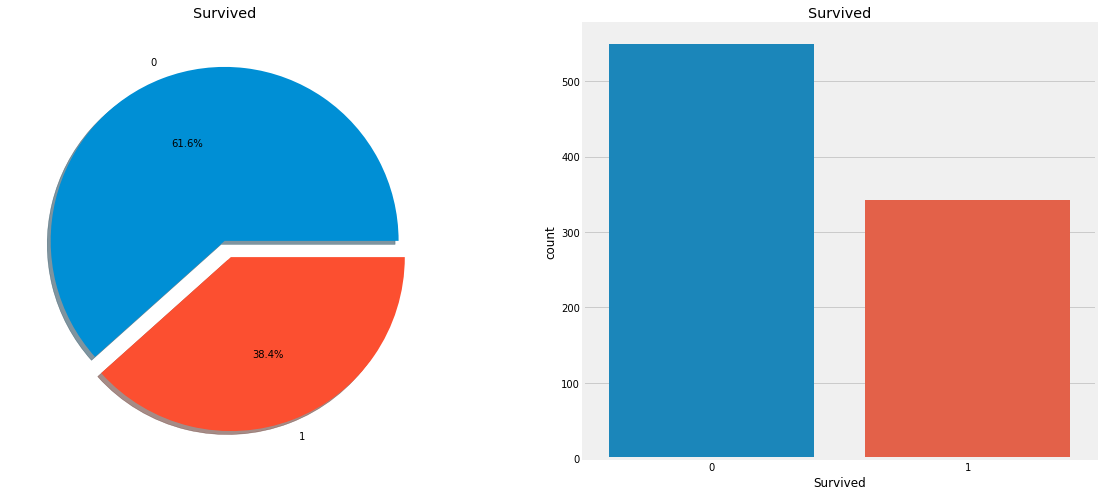

In [6]:
# 用饼图可视化数据
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

很明显船上大多数人没有得以存活。

891名乘客只有大概38.4%的人活了下来，我们需要去挖掘数据来清楚是哪一些人存活的概率较大。

## 数据类型

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Sex,Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

## 数据分析

## Sex--> Categorical Feature

In [7]:
# 用groupby和count来展示性别与存活的数目联系
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

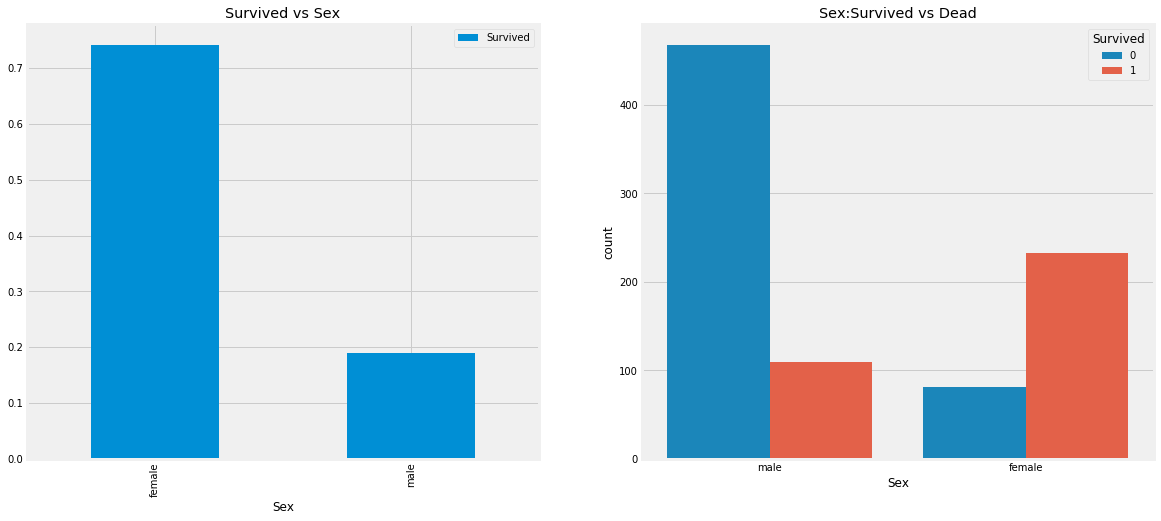

In [8]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

从上面的可视化矩形图就可以看出，船上的男性数量比女性的总数要多很多，但是女性存活率却比男性要高出不少。这与电影里的撤退方案是相符的，同时也暗示Sex很可能是权重很大的特征。

## Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


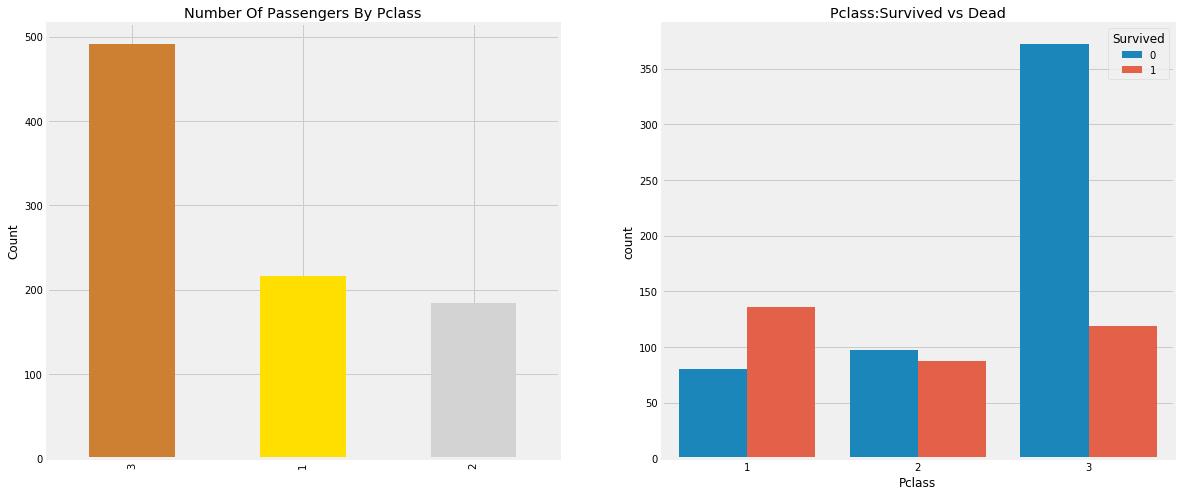

In [10]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

钱不是万能的但没有钱确实万万不能的，我们可以看到三等舱人数远多于一二等舱，但却存活率只有25%左右，比一二等舱差出不少

一等舱的存活率高达63%，二等舱也有48%。

这时候我们可以将不同特征关联起来看，比如Sex与Pclass

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

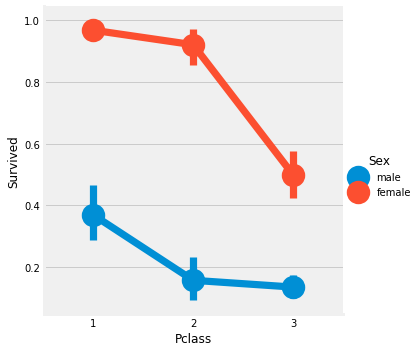

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

在这里用了 **FactorPlot** ，它可以将类别变量很清晰的分开。

从上面的两张图可以看出，一等舱的女性大概全存活了下来。并且不管舱位的等级，女性的存活率都要高于男性。

看样子Pclass这一特征也很关键

## Age--> Continous Feature


In [13]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


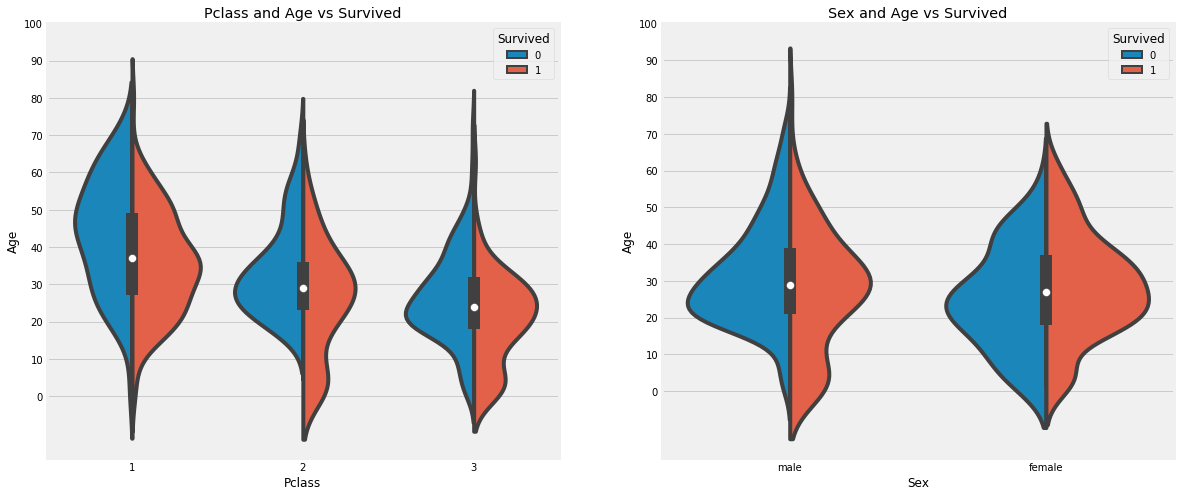

In [14]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0 ,110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### 观察与结论:

1)随着舱位等级的下降，小孩子的个数增多了。这也符合社会地位的规律。婴幼儿的存活的个数是大于死亡的个数的。

2)对于男性，随着年龄的增长死亡人数增加

3)存活人数密集分布在20-50岁间

从竖琴图也能看出，年龄也是很有意义的一个特征，但是很不幸的是在训练集和测试集中均有缺失数据。一个很一般的解决方法是取平均值，但是这会很有风险，如果我们给一个4岁儿童取了平均的29岁年龄，那么势必fit出的model会有偏差。

我们可以从姓名中的epithet看出这个人的身份和年龄来推断其年龄，比如Master(少爷)很明显是小孩子的年龄，而Miss也要比Mrs年轻，那么我们可以先提取出姓名中的这一称呼，然后将其与年龄组到一起，取一类人的中位数或平均数年龄来填充缺失数据这样较为合理。

In [15]:
# data['Initial']=0
for name_string in combine['Name']:
    combine['Initial'] = combine['Name'].str.extract('([A-Za-z]+)\.', expand=True)#let's extract the Salutations

这里用了py的正则表达式: **[A-Za-z]+)\.**. 它寻找**.(dot)** 前面含有 **A-Z or a-z** 的字符串，这从名字中可以看出这一规律。

In [16]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
# 将combine中操作的新数据赋值给原始的训练集和测试集
data['Initial'] = combine['Initial'][: 891]
test_df['Initial'] = combine['Initial'][891: ]

In [18]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 填补Age的缺失数据

In [20]:
# 在这里有一些更加异域的称呼，像Dona是西班牙式对Mrs的称呼，我们首先要将它们归类为常见的称呼类型。
# Replacing rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
combine.replace({'Initial': mapping}, inplace=True)
initials = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
# 用每一类Initial的众数填补缺失数据。
for initial in initials:
    age_to_impute = combine.groupby('Initial')['Age'].median()[initials.index(initial)]
    combine.loc[(combine['Age'].isnull()) & (combine['Initial'] == initial), 'Age'] = age_to_impute

data['Age'] = combine['Age'][: 891]
test_df['Age'] = combine['Age'][891: ]

# 扔掉了称号这一数据
combine.drop('Initial', axis=1, inplace=True)
data.drop('Initial', axis=1, inplace=True)
test_df.drop('Initial', axis=1, inplace=True)

这里我来说一点特征的问题，我看到许多人都用了称号最后来预测数据，我觉得这样做有些画蛇添足的意思。因为年龄的缺失数据我们是用Initial填补的，而称呼又与性别相关度很高，所以如果保留称呼这个特征的话和年龄与性别会有很高的冲突，最后可能导致overfitting，所以我扔掉了它，最终结果也有了提高。

In [21]:
data.Age.isnull().any() 

False

In [22]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

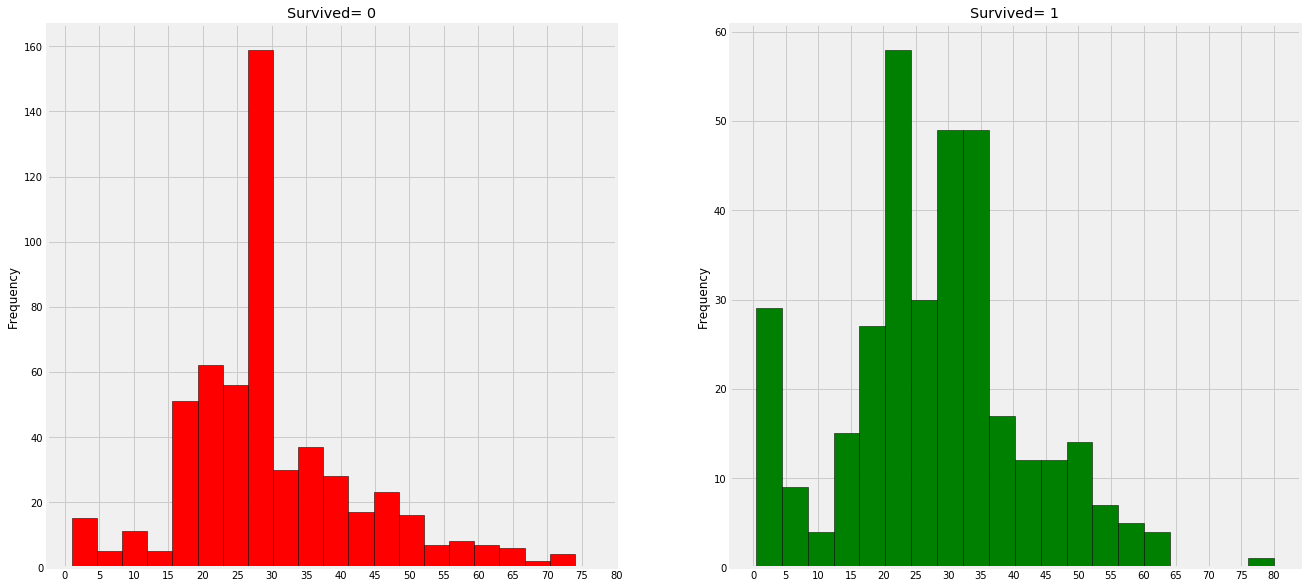

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

### 观察与结论:
1)年龄小于5岁的孩子大批获救了，满足女士孩子优先的policy.

2)年龄最大的80岁老汉也得救了，对老人的尊重.

3)死亡人数与存活人数最多都集中在中年，这不能说明什么只能说明这个年龄段人数最多.

The Women and Child first policy thus holds true irrespective of the class.

## Embarked--> Categorical Value

In [24]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

### 不同港口上船的存活率

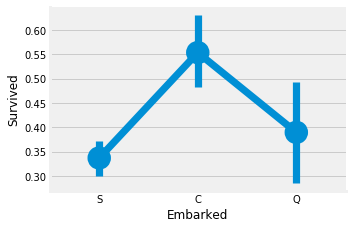

In [26]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C港的存活率最高，S港的较低

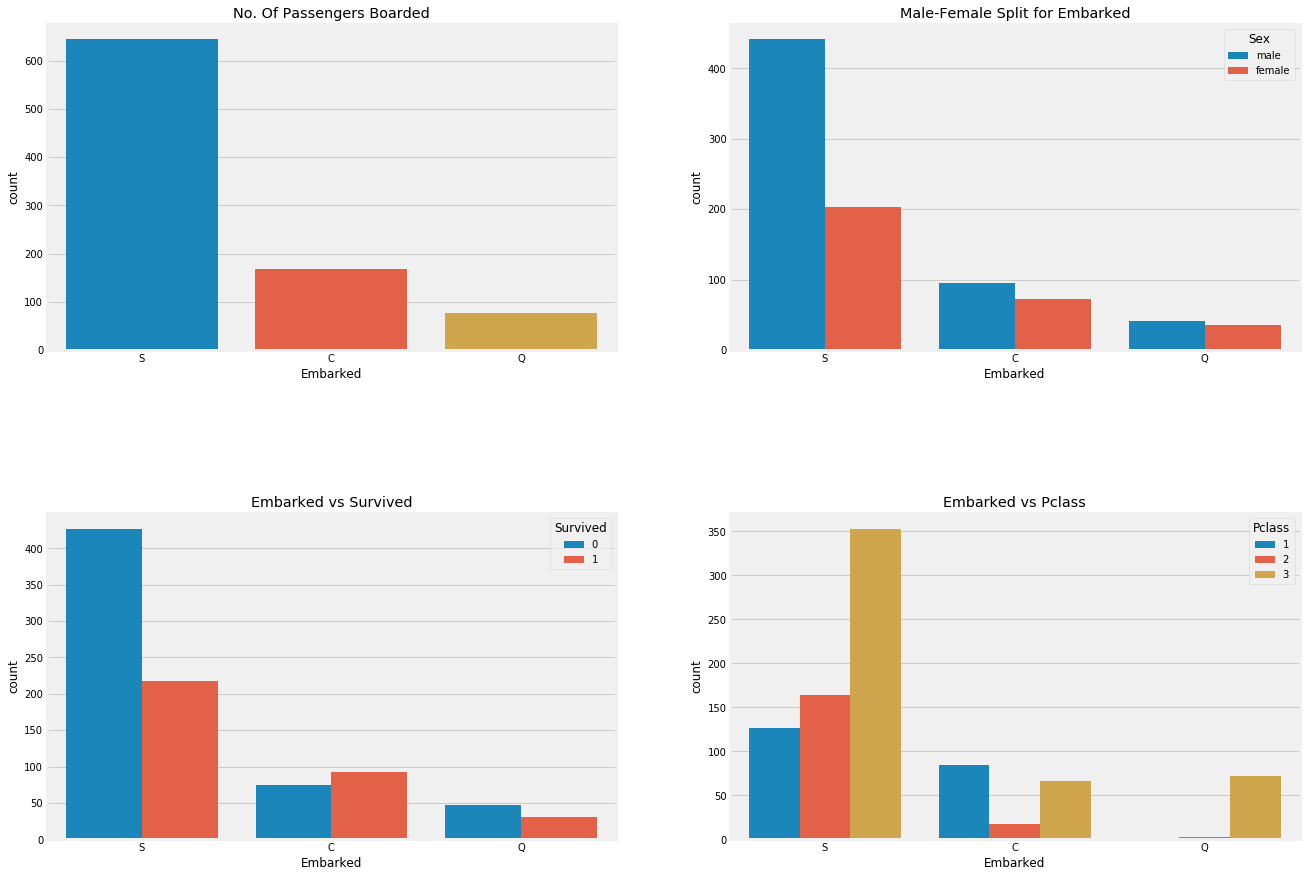

In [27]:
f, ax = plt.subplots(2 , 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 观察与结论:
1)大批登船的人都是在S港，而其中含有大批的三等舱乘客.

2)C港的一二等舱人数占多数，最终导致其整体存活率过半。

3)Q港乘客中有95%都是三等舱乘客

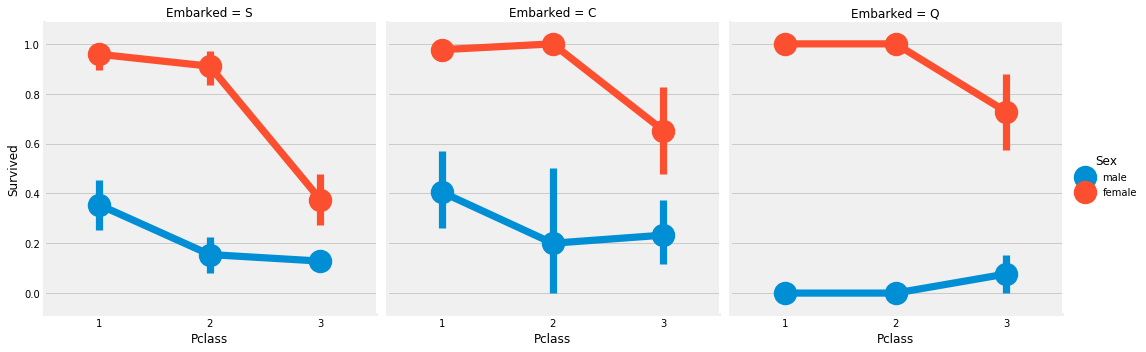

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

### 观察与结论:

1)一二等舱的女性存活率都接近于1.

2)S港的女性存活率也很低，因为三等舱乘客较多

3)Q港的男性几乎全部遇难，也是因为Q港几乎全是三等舱乘客.


### 填充Embarked缺失数据

由于大量乘客从S港上船，而缺失数据较少，我们又无法推知港口，所以我们用S填充确实数据

In [29]:
combine['Embarked'].fillna('S', inplace=True)

In [30]:
data['Embarked'] = combine['Embarked'][: 891]
test_df['Embarked'] = combine['Embarked'][891: ]

In [31]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature
底下是kaggle的数据解释

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife 

In [32]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


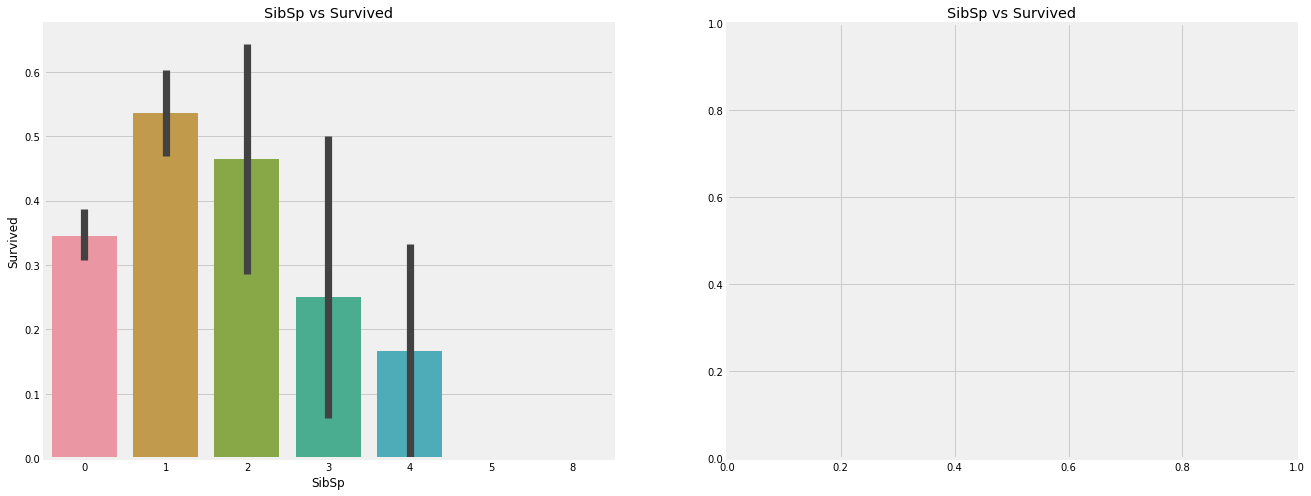

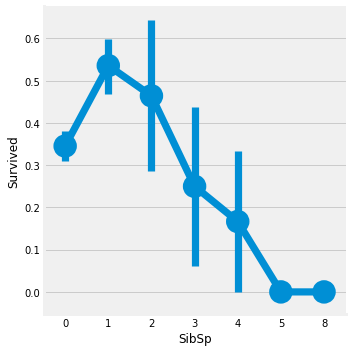

In [33]:
f, ax=plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
# plt.close(2)
plt.show()

In [34]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### 观察与结论:


从上面的图表可以发现兄弟姐妹小于等于2时的存活率较高，而大于3后存活率较低，这或许是一家子人互相谦让都想让对方上船最后都没走成？其实应该是舱的等级的问题，大家族的人都是三等舱，存活率较低，与之相反，人数少的家庭一二等舱的人数较多。

## Parch

In [35]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

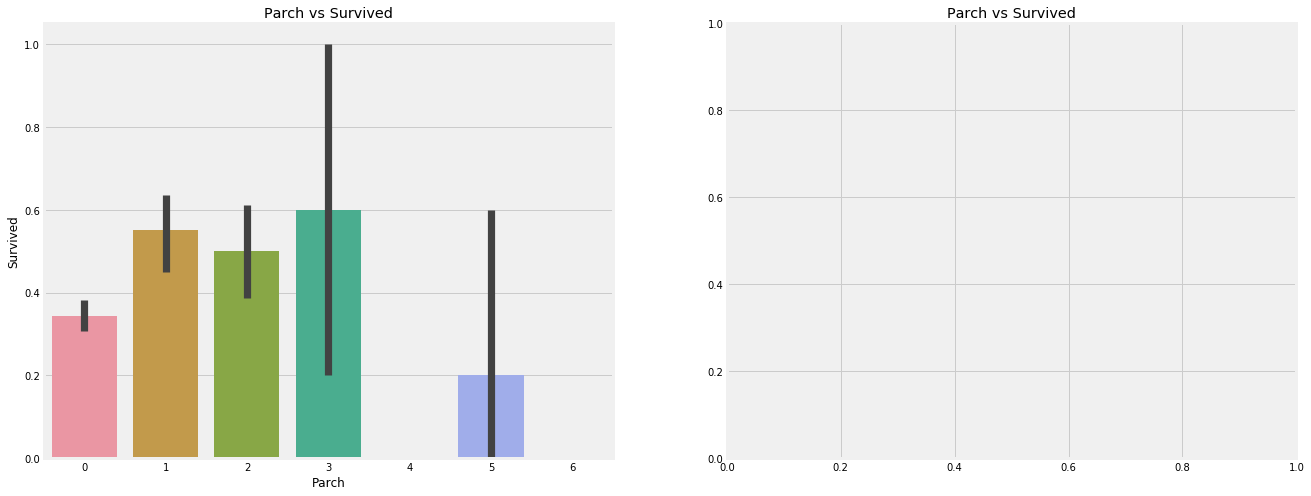

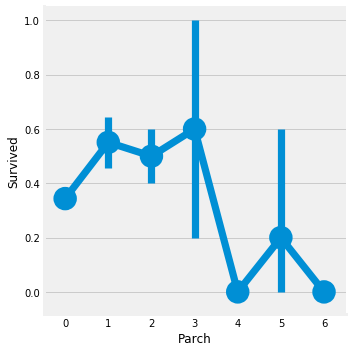

In [36]:
f, ax=plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
# plt.close(2)
plt.show()

### 观察与结论:

这里父母和配偶的数据与兄弟姐妹极其相似，就不赘述了。

## Fare--> Continous Feature

In [37]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is **0.0**. Wow!! a free luxorious ride. 

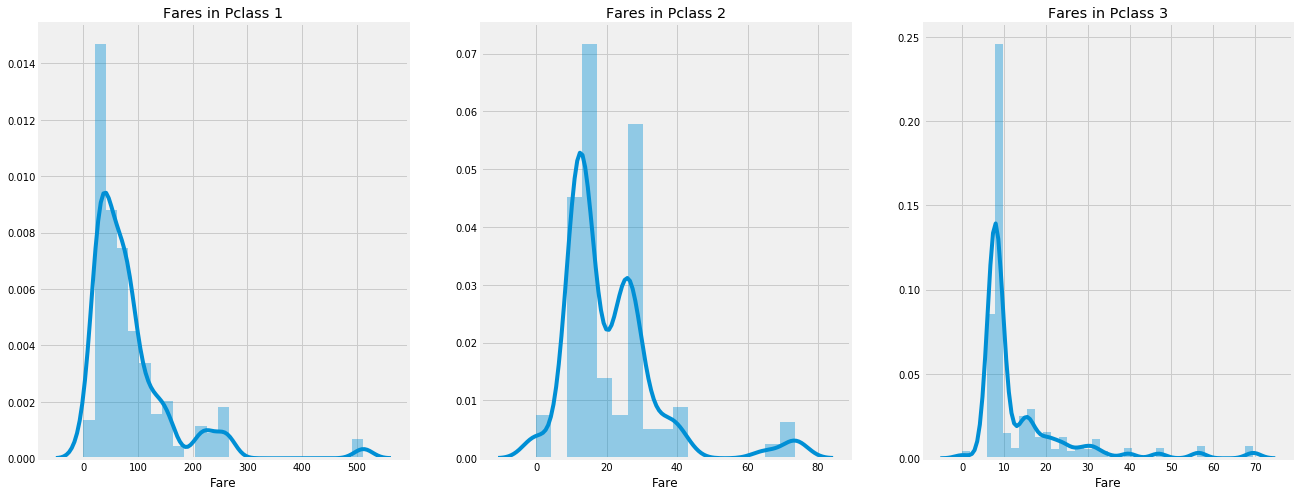

In [38]:
f, ax=plt.subplots(1, 3,figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

很讨厌的是，测试集中有一个缺失的票价数据，而从上面的图表可以看出，票价和舱位是紧密联系的，为了精确我找出缺失数据的人的Pclass，以此为依据预测他的票价。

In [39]:
test_df.loc[(test_df.Fare.isnull())]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [40]:
test_df[test_df['Pclass'] == 3].Fare.mean()

12.459677880184334

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

In [41]:
test_df.loc[test_df.Fare.isnull()] = test_df[test_df['Pclass'] == 3].Fare.mean()

In [42]:
combine['Fare'][891: ] = test_df['Fare']

In [43]:
combine.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [44]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [45]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

很明显票价值是连续的数据，在机器学习中我们对于这一特征的处理方法就是将其切分离散化。

## 所有特征结论:
**Sex:** 女性的存活人数显然居多，女士优先.

**Pclass:** 有钱能使鬼推磨，一二登舱的存活率远大于三等舱。

**Age:** 小孩的存活率好于成年人，大部分人的年龄集中在中年。

**Embarked:** 这个特征其实是一个干扰特征，我在处理掉他后分数提高了1.5分。理性分析其实根本不应该留这个特征，港口怎么能决定存活与否呢？

**Parch+SibSp:** 1-2SibSp与1-3Parch的存活率较高，大家族几乎全军覆没。

## 特征相关度

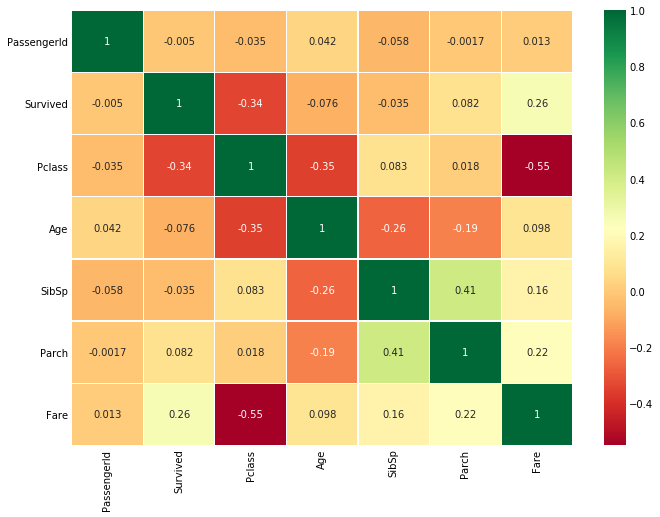

In [46]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Heatmap

值得注意的是，heatmap只会显示数字特征间的关联，这里还未对数据进行最后的处理只是初步的判断

从这里我们可以看出特征间的相关度，绝对值越大的数据间相关度越高。我们可以发现或许可以组合一些特征，比如兄弟姐妹父母就可以组成家庭，用last name可以关联家庭。也可以去除一些数据，比如如果有了家庭数据，那么就可以删去SibSp与Parch了。

## Part2: Feature Engineering and Data Cleaning

在这一阶段主要对数据进行清理，就像修花剪草一样。剪去一些杂草，让模型纯度更高一些。这个过程很漫长，很多时候我们还要根据最后模型的CV分数回过头来继续清理数据。

## AgeBin_Code

#### 连续型数据面临的问题:

打个比方，如果我们像通过性别来分开人类，那么很好半，只能分两类，男人与女人，界限很清晰明了。但如果让你拿年龄分类我们自然会想到小孩青少年小伙子中年人老人，但是如果是连续值，比如30个人有30个年龄，每个年龄之间的界限若不明朗对于最后判决是会起副作用的。

所以我们用了传统的qcut与bin对连续值进行了离散化处理。

我将年龄按人数等分划分成了4份，当然对combine操作时也包括了测试集

In [47]:
combine['AgeBin'] = pd.qcut(combine['Age'], 4)

label = LabelEncoder()
combine['AgeBin_Code'] = label.fit_transform(combine['AgeBin'])

data['AgeBin_Code'] = combine['AgeBin_Code'][: 891]
test_df['AgeBin_Code'] = combine['AgeBin_Code'][891: ]

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [48]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,AgeBin_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(0.169, 22.0]",0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(36.0, 80.0]",3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(22.0, 30.0]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 36.0]",2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 36.0]",2


In [49]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin_Code
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,2
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,3
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,3
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,1
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,0


In [50]:
data['AgeBin_Code'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,AgeBin_Code
1,297
0,271
3,196
2,127


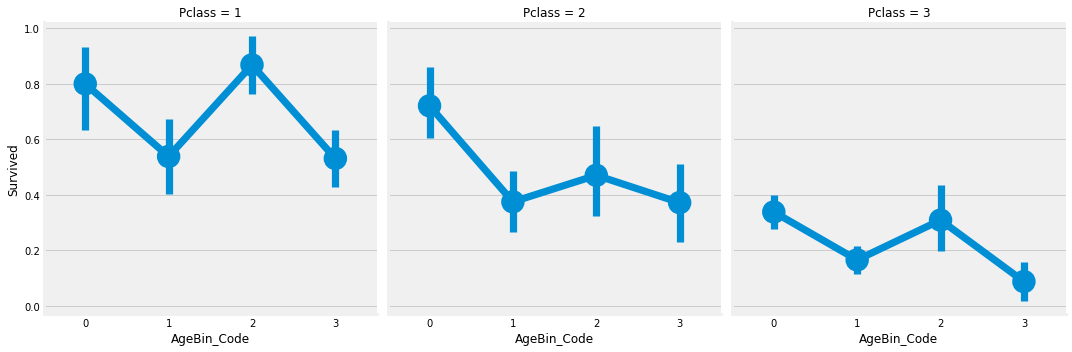

In [51]:
sns.factorplot('AgeBin_Code', 'Survived', data=data, col='Pclass')
plt.show()

## Family_Size

我们之前看到兄弟姐妹和父母可以组成一个家庭，那么自然我们可以想到将他们加起来计算家庭的大小

In [52]:
combine['Family_Size'] = combine['Parch'] + combine['SibSp']

data['Family_Size'] = combine['Family_Size'][: 891]
test_df['Family_Size'] = combine['Family_Size'][891: ]

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin_Code,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0


## Adding Family_Survival

这里我们想到，通过每个人的last name(姓氏)与他的船票信息，或许可以更加精确定位这一家子。因为船票Fare与Ticket有许多是重复的所以我们猜想可能有家庭票。


In [54]:
combine['Last_Name'] = combine['Name'].apply(lambda x: str.split(x, ",")[0])

DEFAULT_SURVIVAL_VALUE = 0.5
combine['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

# 这里grp是(Last Name, Fare)元组，grp_df则是其家庭成员每个人的信息。
for grp, grp_df in combine[['Survived', 'Name', 'Last_Name', 'Fare', 'Ticket',
                           'PassengerId', 'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    if (len(grp_df) != 1):        # 找到了这一家庭
        # ind = index即是每个乘客的索引，row是这一乘客的信息
        for ind, row in grp_df.iterrows():
            # 去掉其中一个人看剩余人的存活情况
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            # 由于我们知道，combine中的测试集的Survived是未知的，所以含有所有成员的Survived都是Nan的情况，而对于这种情况我们就取原来的default值0.5
            if (smax == 1.0):
                combine.loc[combine['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin == 0.0):
                combine.loc[combine['PassengerId'] == passID, 'Family_Survival'] = 0
                
print("Number of passengers with family survival information:", 
      combine.loc[combine['Family_Survival'] != 0.5].shape[0])

Number of passengers with family survival information: 420


In [55]:
for grp, grp_df in combine.groupby('Ticket'):
    if(len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            # 这里进一步扩大了“Family”的定义，买到相同票的人可能也许是好友并非家人，所以这里并没有groupby里加入
            #Last_name，并且只对Family_Survival != 1 操作，因为加入了好友。
            
            if(row['Family_Survival'] == 0) | (row['Family_Survival'] == 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    combine.loc[combine['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    combine.loc[combine['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passenger with family/group survival information: " 
      +str(combine[combine['Family_Survival'] != 0.5].shape[0]))

Number of passenger with family/group survival information: 546


In [56]:
data['Family_Survival'] = combine['Family_Survival'][: 891]
test_df['Family_Survival'] = combine['Family_Survival'][891: ]

In [57]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,AgeBin_Code,Family_Size,Last_Name,Family_Survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(0.169, 22.0]",0,1,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(36.0, 80.0]",3,1,Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(22.0, 30.0]",1,0,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 36.0]",2,1,Futrelle,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 36.0]",2,0,Allen,0.5


In [58]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin_Code,Family_Size,Family_Survival
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,2,0,0.5
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,3,1,0.5
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,3,0,0.5
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,1,0,0.5
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,0,2,1.0


## FareBin_Code

Fare同样是一个连续特征，在这里我们对其做与Age相似的处理

In [59]:
combine['FareBin'] = pd.qcut(combine['Fare'], 5)

label = LabelEncoder()
combine['FareBin_Code'] = label.fit_transform(combine['FareBin'])

data['FareBin_Code'] = combine['FareBin_Code'][: 891]
test_df['FareBin_Code'] = combine['FareBin_Code'][891: ]

In [60]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin_Code,Family_Size,Family_Survival,FareBin_Code
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,2,0,0.5,0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,3,1,0.5,0
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,3,0,0.5,1
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,1,0,0.5,1
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,0,2,1.0,2


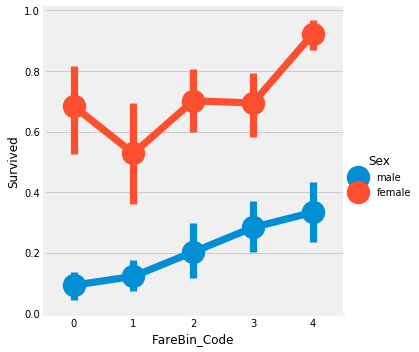

In [61]:
sns.factorplot('FareBin_Code', 'Survived', data=data, hue='Sex')
plt.show()

可以看到大体的趋势是随着票价增长，存活率增高。

## 对字符特征进行编码

因为算法无法对字符特征进行处理，所以我们要将其转化成数字格式

In [62]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0, 1, 2], inplace=True)
test_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
test_df['Embarked'].replace(['S','C','Q'], [0, 1, 2], inplace=True)

In [63]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin_Code,Family_Size,Family_Survival,FareBin_Code
0,892.0,3.0,"Kelly, Mr. James",0.0,34.5,0.0,0.0,330911,7.8292,NaN,2.0,2,0,0.5,0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",1.0,47.0,1.0,0.0,363272,7.0000,NaN,0.0,3,1,0.5,0
2,894.0,2.0,"Myles, Mr. Thomas Francis",0.0,62.0,0.0,0.0,240276,9.6875,NaN,2.0,3,0,0.5,1
3,895.0,3.0,"Wirz, Mr. Albert",0.0,27.0,0.0,0.0,315154,8.6625,NaN,0.0,1,0,0.5,1
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,22.0,1.0,1.0,3101298,12.2875,NaN,0.0,0,2,1.0,2


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    float64
 1   Pclass           418 non-null    float64
 2   Name             418 non-null    object 
 3   Sex              418 non-null    float64
 4   Age              418 non-null    float64
 5   SibSp            418 non-null    float64
 6   Parch            418 non-null    float64
 7   Ticket           418 non-null    object 
 8   Fare             418 non-null    float64
 9   Cabin            92 non-null     object 
 10  Embarked         418 non-null    float64
 11  AgeBin_Code      418 non-null    int32  
 12  Family_Size      418 non-null    int64  
 13  Family_Survival  418 non-null    float64
 14  FareBin_Code     418 non-null    int32  
dtypes: float64(9), int32(2), int64(1), object(3)
memory usage: 45.8+ KB


In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin_Code,Family_Size,Family_Survival,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0.5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3,1,0.5,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0.5,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,1,0.0,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,2,0,0.5,1


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    int64  
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         891 non-null    int64  
 12  AgeBin_Code      891 non-null    int32  
 13  Family_Size      891 non-null    int64  
 14  Family_Survival  891 non-null    float64
 15  FareBin_Code     891 non-null    int32  
dtypes: float64(3), int32(2), int64(8), object(3)
memory usage: 104

### 丢弃无用数据

**Name**--> 我们从中提取出了Initial，然后从Initial填充了Age的缺失数据，所以这个特征已经几乎被剥削干净了。

**Age**--> 已经被编码成AgeBin_Code

**Ticket**--> 它为Family_Survival做出了贡献，利用完了dump掉

**Fare**--> 已经被编码成FareBin_Code

**Cabin**--> 如果这个空缺数据很少那么这个特征或许更为有用，我们可以从Cabin的号码推断它的位置，逃离获救的概率也会不同。但这面临过拟合的风险，因为毕竟这个数据空缺的太多了，很难填补缺失数据。

**PassengerId**--> 无法被分类

**Parch & SibSp**--> 从他们榨出了Family_Size与Family_Survival的数据

**Embarked**--> 理性告诉我们，不管你从哪里上船，你的生死都是难以预料的。丢掉它后分数提高了1.5分。

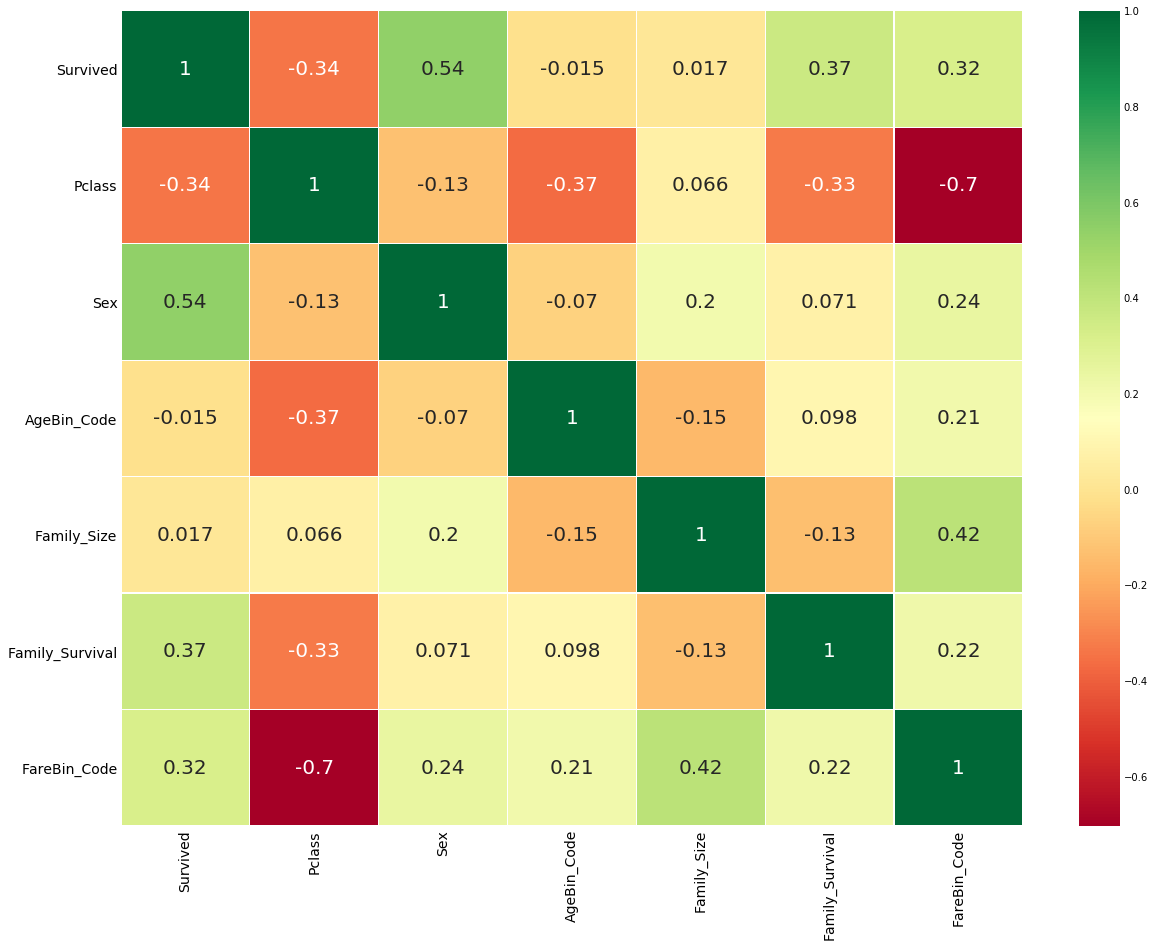

In [67]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'PassengerId', 'Parch', 'SibSp', 'Embarked'], axis=1, inplace=True)
test_df.drop(['Name', 'Age','Ticket', 'Fare', 'Cabin', 'PassengerId', 'Parch', 'SibSp', 'Embarked'], axis=1, inplace=True)

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [68]:
test_df.head()

,Pclass,Sex,AgeBin_Code,Family_Size,Family_Survival,FareBin_Code
0,3.0,0.0,2,0,0.5,0
1,3.0,1.0,3,1,0.5,0
2,2.0,0.0,3,0,0.5,1
3,3.0,0.0,1,0,0.5,1
4,3.0,1.0,0,2,1.0,2


In [69]:
data.head()

,Survived,Pclass,Sex,AgeBin_Code,Family_Size,Family_Survival,FareBin_Code
0,0,3,0,0,1,0.5,0
1,1,1,1,3,1,0.5,4
2,1,3,1,1,0,0.5,1
3,1,1,1,2,1,0.0,4
4,0,3,0,2,0,0.5,1


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   AgeBin_Code      891 non-null    int32  
 4   Family_Size      891 non-null    int64  
 5   Family_Survival  891 non-null    float64
 6   FareBin_Code     891 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.9 KB


In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    float64
 1   Sex              418 non-null    float64
 2   AgeBin_Code      418 non-null    int32  
 3   Family_Size      418 non-null    int64  
 4   Family_Survival  418 non-null    float64
 5   FareBin_Code     418 non-null    int32  
dtypes: float64(3), int32(2), int64(1)
memory usage: 16.5 KB


# Part3: 建模与预测

下面该用算法拟合得到的数据了，用的初始模型如下：

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [72]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [73]:
X = data.drop('Survived', 1)
Y = data['Survived']
X_test = test_df.copy()

参数的归一化也是很必要的，归一化后分数有了提高

In [74]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [75]:
X_test.shape

(418, 6)

In [76]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1: ]]
train_Y = train[train.columns[ :1]]
test_X = test[test.columns[1: ]]
test_Y = test[test.columns[ :1]]

In [77]:
train_X = std_scaler.fit_transform(train_X)
test_X = std_scaler.transform(test_X)

In [78]:
test_X.shape

(268, 6)

### Radial Support Vector Machines(rbf-SVM)

In [79]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.8507462686567164


### Linear Support Vector Machine(linear-SVM)

In [80]:
model = svm.SVC(kernel = 'linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.835820895522388


### Logistic Regression

In [81]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8507462686567164


### Decision Tree

In [82]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))


The accuracy of the Decision Tree is 0.8470149253731343


### K-Nearest Neighbours(KNN)

In [83]:
model = KNeighborsClassifier() 
model.fit(train_X, train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8246268656716418


KNN的表现并不怎么理想，可能参数初步是随手给的，下面我们可视化一下，看看趋势

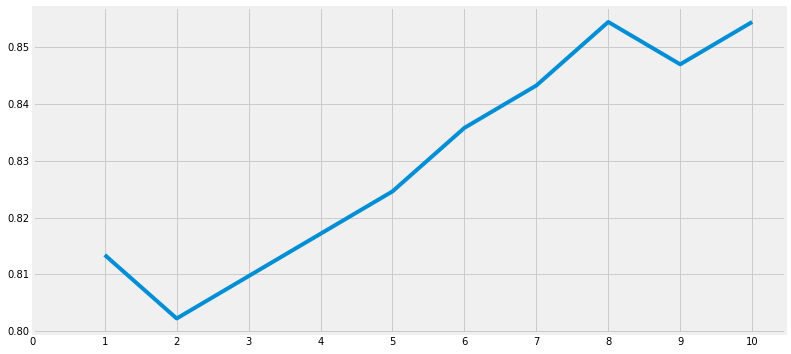

Accuracies for different values of n are: [0.81343284 0.80223881 0.80970149 0.81716418 0.82462687 0.8358209
 0.84328358 0.85447761 0.84701493 0.85447761] with the max value as  0.8544776119402985


In [84]:
a_index = list(range(1, 11))
a = pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

当然用上面的这个办法是不够准确的，我们用常用的GridSearchCV来让电脑帮我们筛选。由于这是二分类问题，所以我们用roc_auc曲线来作为评判标准。

In [85]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8793614011261071
KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   10.0s finished


### Gaussian Naive Bayes

In [86]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.7835820895522388


### Random Forests

In [87]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8582089552238806



# Cross Validation

In [88]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=18), 
        DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
#     cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.811423,0.028475
Radial Svm,0.847328,0.029949
Logistic Regression,0.828290,0.022438
KNN,0.845131,0.021088
Decision Tree,0.826067,0.021181
Naive Bayes,0.774469,0.042969
Random Forest,0.837316,0.029863


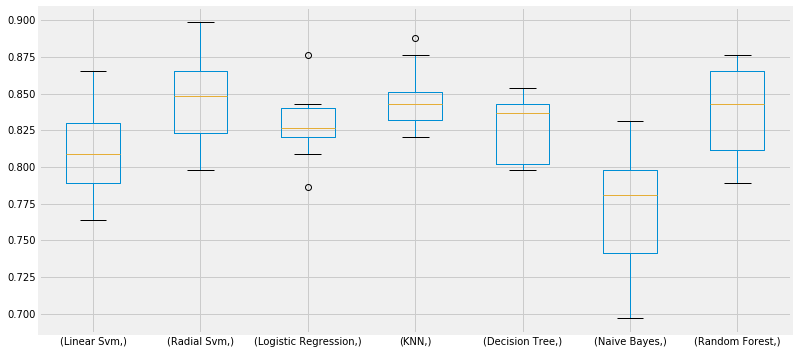

In [89]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

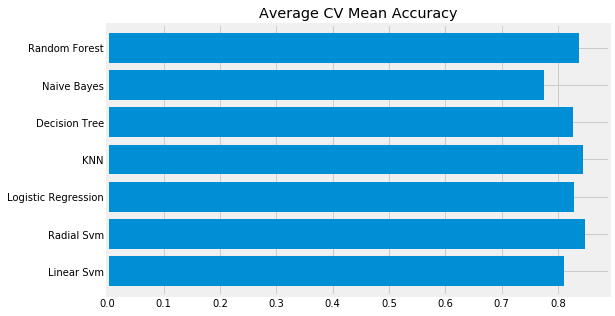

In [90]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()


## 混淆矩阵


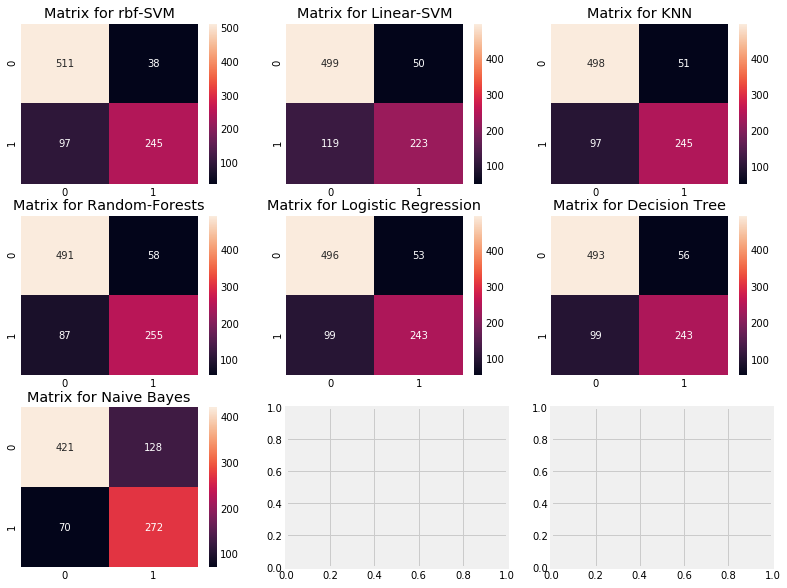

In [91]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### 混淆矩阵分析

从不同的模型可以看出，有的模型如SVM，他把38个遇难者误判为幸存者，而97个幸存者误判成遇难者，那说明他的查准率不如查全率，有的模型如朴素贝叶斯正相反。有时我们需要根据任务的需求来选择倾向于查全率或是查准率的模型。

### 超参调试

#### SVM

In [92]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True, cv=10, scoring = "roc_auc")
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.880798291033585
SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   23.0s finished


#### Random Forests

In [93]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True, cv=10, scoring = "roc_auc")
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8797701383583737
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   56.7s finished


# Ensembling

模型的组合能有效避免过拟合，一般重组的各子模型相关度越低越好

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

较为简单的组合模型模式，基于每个模型的得分最终取平均。这里我们把之前调好的超参模型直接代入进去。

In [94]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')),
                                              ('RBF',svm.SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
                                              ('RFor',RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              # ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8582089552238806
The cross validated score is 0.8327840199750313


## Bagging

不像voting，bagging的分类器应尽可能类似，它相当于将数据集分为很小份，最后取每份得分的平均数

#### Bagged KNN

In [95]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform'),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8544776119402985
The cross validated score for bagged KNN is: 0.8395255930087391


#### Bagged DecisionTree


In [96]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8507462686567164
The cross validated score for bagged Decision Tree is: 0.8350436953807738


## Boosting

Boosting的工作机理大概是先对全局进行一个粗略的预测，下一次递归时针对错误的数据加入新的分类器，好比考试完针对错题查缺补漏。

#### AdaBoost(Adaptive Boosting)

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8193258426966292


#### Stochastic Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8462297128589263


#### XGBoost

In [99]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8451435705368289


我们看到XGBoost与Stochastic Gradient Boosting的表现相仿也较好，对他们进一步调参

In [100]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=xg.XGBClassifier(),param_grid=hyper,verbose=True, cv=10, scoring = "roc_auc")
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8941350762527233
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  3.5min finished


In [101]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True, cv=10, scoring = "roc_auc")
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8934237048354696
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  7.1min finished


### Confusion Matrix for the "Best Models"

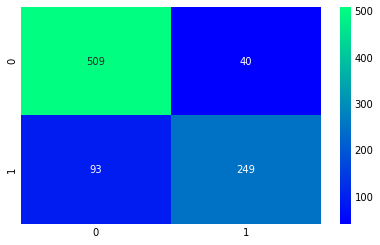

In [102]:
xgboost = xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
result=cross_val_predict(xgboost,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

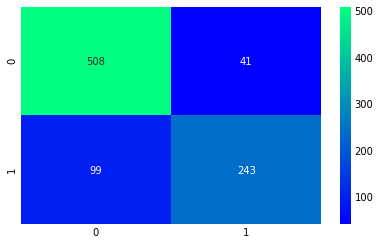

In [103]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')
result=cross_val_predict(knn,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

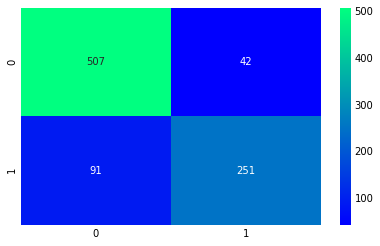

In [104]:
grad = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
result=cross_val_predict(grad,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

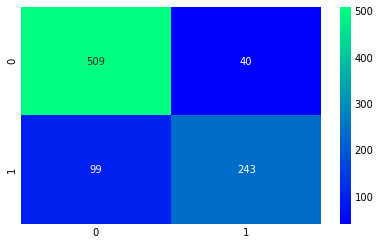

In [105]:
s = svm.SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
result=cross_val_predict(s,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

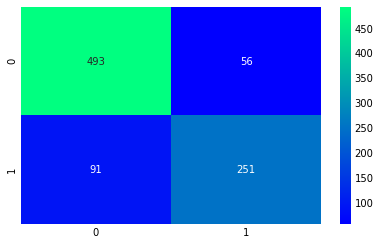

In [106]:
RFC = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
result=cross_val_predict(RFC,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

# 最终结果预测


In [111]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

knn.fit(X, Y)

predictions = knn.predict(X_test)

In [112]:
EDASubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                             'Survived': predictions})
EDASubmission.to_csv("EDASubmission.csv", index=False)